<a href="https://colab.research.google.com/github/RyutoYoda/Prediction-of-Seagrass-Coverage/blob/main/Prediction_of_Seagrass_Coverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
os.chdir('/content/drive/MyDrive/ocean') 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [4]:
train = pd.read_csv('train_data.csv')

In [5]:
test = pd.read_csv('test_data.csv')

In [17]:
train.head(10)

,Unnamed: 0,lat,lon,area,YMD,year,month,cover,aicial_length,beach_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
9,9,26.155929,127.293214,20.0,2010-06-12,2010.0,6.0,0.050,0.000000,1329.338867,...,0.458747,0.265506,-0.288733,-0.860659,-2.281138,-2.063138,46.759740,1.034489,-1.468705,28
15,15,26.166508,127.286032,20.0,2010-06-12,2010.0,6.0,0.050,41.101051,991.131287,...,0.431138,0.289216,-0.342841,-0.848984,-2.952788,-2.945113,48.090048,0.702973,-0.923665,28
39,39,26.389722,126.784389,20.0,2010-09-14,2010.0,9.0,0.050,0.000000,1099.091675,...,0.486724,0.290973,-0.197801,-0.654206,-1.906783,-4.462097,206.462074,1.684040,0.436109,26
40,40,26.763194,128.187500,20.0,2009-10-02,2009.0,10.0,0.025,215.676224,410.925446,...,0.479057,0.277900,-0.313987,-0.883498,-2.223354,2.068436,34.131447,4.245066,-2.560673,46
140,140,24.299194,123.667167,20.0,2010-08-16,2010.0,8.0,0.050,0.000000,944.818359,...,0.548743,0.291049,-0.276675,-0.786396,-1.927643,2.314556,74.153810,4.403636,-1.877396,3
167,167,26.184167,127.944806,20.0,2010-01-24,2010.0,1.0,0.025,0.000000,0.000000,...,0.445781,0.276260,-0.318962,-0.872992,-2.793050,2.213116,39.566762,2.666382,-2.020661,33
205,205,26.736056,127.796000,20.0,2011-07-31,2011.0,7.0,0.050,0.768372,809.686584,...,0.549835,0.265500,-0.315177,-0.805526,-1.673346,2.056682,49.315066,5.584906,-4.146342,43
207,207,24.401000,123.813918,1.5,2020-02-26,2020.0,2.0,0.425,76.251358,1129.410034,...,0.404250,0.322908,-0.202809,-0.775134,-2.892699,2.697874,130.637991,2.652680,0.258454,7
214,214,26.143222,127.268500,20.0,2010-06-13,2010.0,6.0,0.050,0.000000,38.685390,...,0.467163,0.322233,-0.106560,-0.607404,-2.183436,-2.265282,241.830273,1.109840,0.286423,28
217,217,26.304389,126.813083,20.0,2010-09-15,2010.0,9.0,0.050,0.000000,637.274841,...,0.523473,0.284302,-0.072058,-0.653657,-2.262087,-4.725481,238.426211,1.975544,0.556539,24


In [16]:
test.head(10)

,Unnamed: 0,lat,lon,area,YMD,year,month,aicial_length,beach_length,coast_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
3,3,26.183639,127.319361,20.0,2010-08-05,2010.0,8.0,0.000000,29.648212,29.648212,...,0.484109,0.270476,-0.320391,-0.863338,-2.708627,-10.433323,45.061952,1.546086,-14.527890,7
8,8,26.198960,127.444742,20.0,2010-06-09,2010.0,6.0,0.000000,905.689758,905.689758,...,0.421440,0.285802,-0.282319,-0.846328,-2.609254,-3.017697,62.376708,0.272568,-3.105368,7
18,18,26.184850,127.366286,20.0,2010-06-07,2010.0,6.0,59.371670,971.919006,1309.969238,...,0.441603,0.269084,-0.355263,-0.838206,-1.906604,-2.290156,52.772081,0.667832,-6.227641,7
26,26,26.207694,127.450139,20.0,2010-06-09,2010.0,6.0,0.000000,1401.650635,1401.650635,...,0.450373,0.276924,-0.278856,-0.846844,-2.430171,-8.011689,59.268423,1.052590,-8.482224,7
30,30,26.242856,127.303787,20.0,2010-06-10,2010.0,6.0,82.391792,2005.551636,2139.115234,...,0.464102,0.271422,-0.380665,-0.850677,-2.246844,-2.799180,46.826187,1.223569,-1.449214,7
37,37,26.193112,127.268877,20.0,2010-06-13,2010.0,6.0,32.765835,2082.504639,2115.270508,...,0.456032,0.279511,-0.330768,-0.799134,-2.158037,-2.391659,148.885205,1.456843,-8.601272,7
42,42,26.165222,127.913056,20.0,2010-01-24,2010.0,1.0,0.000000,472.846161,472.846161,...,0.468758,0.273865,-0.291975,-0.865314,-2.281549,2.389864,40.444301,3.246092,-4.543796,6
59,59,26.226444,127.335944,20.0,2010-06-10,2010.0,6.0,0.000000,1290.525269,1380.839722,...,0.429704,0.276746,-0.590523,-0.910469,-2.354363,-5.519603,52.782253,1.516093,-2.132342,7
71,71,26.155111,127.894722,20.0,2010-01-24,2010.0,1.0,16.777967,759.207581,775.985596,...,0.414947,0.273016,-0.293434,-0.857325,-3.091707,2.246994,45.606414,2.088974,-1.812803,6
72,72,26.231778,127.373389,20.0,2010-06-08,2010.0,6.0,0.000000,1579.178101,1611.570557,...,0.497048,0.273411,-0.564929,-0.906568,-2.142345,1.391749,41.759298,3.784787,-3.462964,7


In [6]:
train = train.drop(['depth_original','cliff_length'], axis=1)

In [7]:
train['YMD'] = pd.to_datetime(train['YMD'], errors='coerce')#NaT（Not a Time）として置き換える

In [8]:
train['YMD'] = pd.to_datetime(train['YMD'], format='%Y-%m-%d')#datetime型に変換

In [9]:
le = LabelEncoder()
train['mesh20'] = le.fit_transform(train['mesh20'])

In [10]:
train.dropna(inplace=True)

In [11]:
test = test.drop(['depth_original','cliff_length'], axis=1)

In [12]:
test['YMD'] = pd.to_datetime(test['YMD'], errors='coerce')

In [13]:
test['YMD'] = pd.to_datetime(test['YMD'], format='%Y-%m-%d')

In [15]:
le = LabelEncoder()
test['mesh20'] = le.fit_transform(test['mesh20'])#最終的には使ってない

In [14]:
test.dropna(inplace=True)

In [18]:
# 特徴量の選択
selected_features = ['lat', 'lon', 'area', 'year', 'month', 
                      'MED_NormR_2018', 'MIN_NormG_2020', 'MIN_NormR_2020',
                     'MIN_PPR_2020', 'MIN_PSNDc2_2020', 'MIN_RDVI_2020', 'MIN_IF_2020',
                     'MIN_SIPI2_2020', 'MIN_VARIgreen_2020']

# 選択された特徴量のみを含むデータフレームを作成
X_train = train[selected_features]
y_train = train['cover']

# lightgbmに読み込ませるためにデータを変換
train_data = lgb.Dataset(X_train, label=y_train)


In [19]:
# パラメータの設定
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.3,
    'num_leaves': 63,
    'verbose': -1
}

# モデルの訓練
model = lgb.train(params, train_data, num_boost_round=100)


In [20]:
test = test.reset_index().rename(columns={'index': 'id'})#indexにid列を付与

In [21]:
# 選択された特徴量のみを含むデータフレームを作成
X_test = test[selected_features]

# 予測の実行
y_pred = model.predict(X_test)

# 予測結果をファイルに保存
submission = pd.DataFrame({'id': test['id'], 'cover': y_pred.round(2),})
submission.to_csv('submission.csv', index=False,header=False)


In [27]:
print(y_pred[:30])# 予測結果

[0.05498962 0.06077568 0.0579394  0.05284106 0.05689022 0.04947706
 0.02038335 0.04678269 0.01191036 0.05657514 0.05571428 0.05966343
 0.05483312 0.04916038 0.08213921 0.06117774 0.06822319 0.05443133
 0.06234552 0.0509473  0.04257723 0.05358143 0.05822116 0.22362139
 0.05286866 0.05217128 0.03731416 0.06452268 0.24596873 0.05129863]


In [22]:
print(submission)

       id  cover
0       3   0.05
1       8   0.06
2      18   0.06
3      26   0.05
4      30   0.06
..    ...    ...
421  4020   0.06
422  4024   0.05
423  4028   0.02
424  4029   0.06
425  4032   0.07

[426 rows x 2 columns]


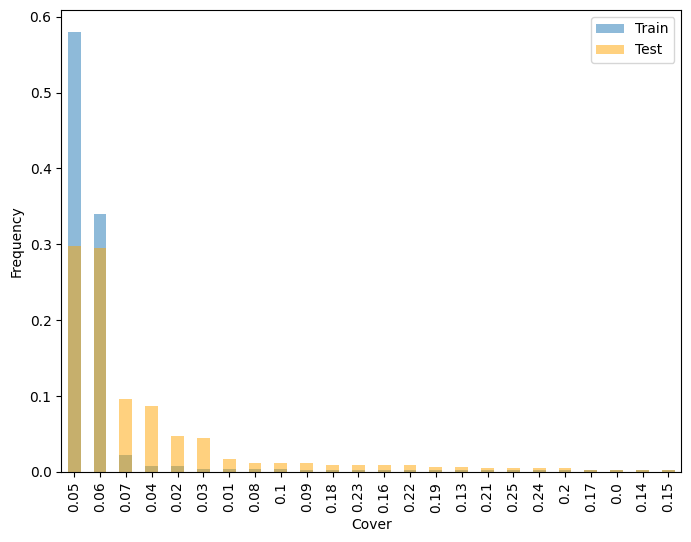

In [ ]:
import matplotlib.pyplot as plt

# 1. trainデータのカバー率を計算する
train_cover = train['cover'].value_counts(normalize=True)

# 2. testデータの予測カバー率を計算する
test_cover = submission['cover'].value_counts(normalize=True)

# 3. グラフを作成
fig, ax = plt.subplots(figsize=(8, 6))
train_cover.plot(ax=ax, kind='bar', alpha=0.5, label='Train')
test_cover.plot(ax=ax, kind='bar', alpha=0.5, color='orange', label='Test')
ax.set_xlabel('Cover')
ax.set_ylabel('Frequency')#頻度
ax.legend()
plt.show()